In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import altair as alt
from altair import Chart
#alt.renderers.enable('notebook')
import seaborn as sns

In [3]:
data = pd.read_csv('data/US_Accidents_June20.csv')
CA_data = data[data['State']=='CA']
countyinfo=pd.read_csv('data/CA_County_Pop_Miles.csv')

In [4]:
countyinfo=pd.read_csv('data/CA_County_Pop_Miles.csv', index_col=0)
county_count=pd.DataFrame(CA_data.groupby('County')['ID'].count())

In [5]:
#print(county_count)
countyinfo['Count']=county_count['ID']
#print(countyinfo)
countyinfo['County']=countyinfo.index
countyinfo['Accidents_Per_Capita']=countyinfo['Count']/countyinfo['pop2020']
countyinfo['Accidents_Per_Square_Mile']=countyinfo['Count']/countyinfo['Square_Miles']
chart=Chart(countyinfo)
chart.mark_point().encode(x=alt.X('pop2020',axis=alt.Axis(title='Population')),
                          y=alt.Y('Count',axis=alt.Axis(title='Number of Accidents'))).properties(
    title='Total of Accidents Per County Jan 2017 - July 2020').interactive()

alt.Chart(...)

In [54]:
countyinfo['Pop_Density']=countyinfo['pop2020']/countyinfo['Square_Miles']
chart=Chart(countyinfo)
chart.mark_point().encode(y=alt.X('Accidents_Per_Capita',axis=alt.Axis(title='Accidents_Per_Capita')),
                          x=alt.Y('Pop_Density',scale=alt.Scale(type='log'),axis=alt.Axis(title='Population Density (log(x))'))).properties(
    title='Accidents Per Capita vs Population Density').interactive()



alt.Chart(...)

In [57]:
countyinfo['Pop_Density']=countyinfo['pop2020']/countyinfo['Square_Miles']
chart=Chart(countyinfo)
chart.mark_point().encode(y=alt.X('Accidents_Per_Square_Mile',axis=alt.Axis(title='Accidents Per Square Mile')),
                          x=alt.Y('Pop_Density',axis=alt.Axis(title='Population Density'))).properties(
    title='Accidents Per Sq Mile vs Population Density').interactive()

alt.Chart(...)

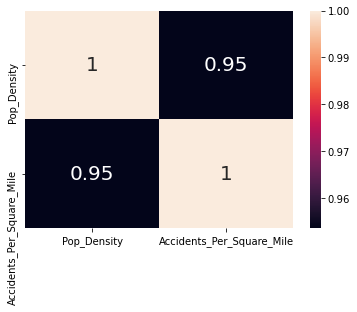

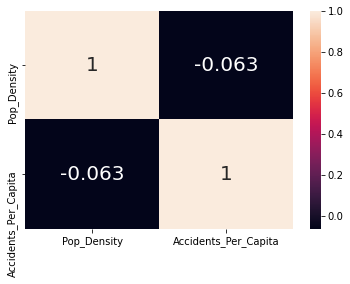

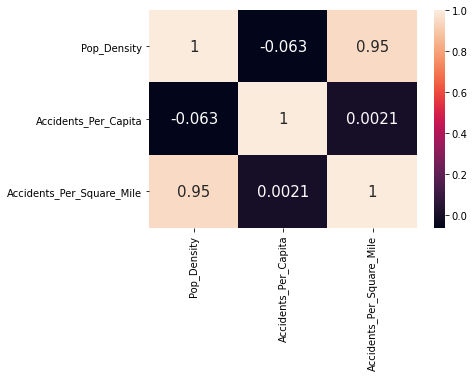

In [67]:
newdf=countyinfo[['Pop_Density','Accidents_Per_Square_Mile']]
corrMatrix = newdf.corr()
sns.heatmap(corrMatrix, annot=True,annot_kws={"size":20})
plt.show()

newdf=countyinfo[['Pop_Density','Accidents_Per_Capita']]
corrMatrix = newdf.corr()
sns.heatmap(corrMatrix, annot=True, annot_kws={"size":20})
plt.show()

newdf=countyinfo[['Pop_Density','Accidents_Per_Capita','Accidents_Per_Square_Mile']]
corrMatrix = newdf.corr()
sns.heatmap(corrMatrix, annot=True, annot_kws={"size":1})
plt.show()

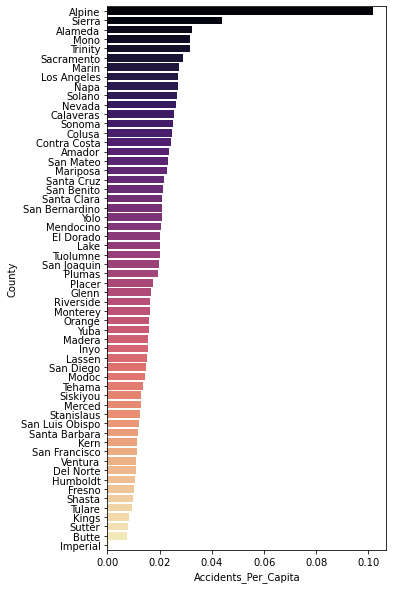

In [7]:
plt.figure(figsize=(5,10))
ax=sns.barplot(x='Accidents_Per_Capita',y='County', data=countyinfo,order=countyinfo.sort_values('Accidents_Per_Capita',ascending=False).County, palette='magma')



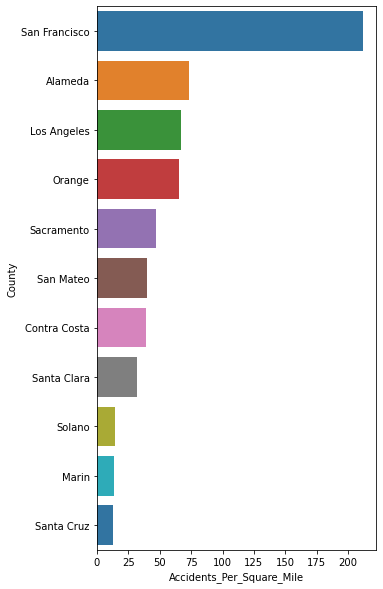

In [8]:
plt.figure(figsize=(5,10))
g_five=countyinfo[countyinfo['Accidents_Per_Square_Mile']>12]
ax=sns.barplot(x='Accidents_Per_Square_Mile',y='County', data=g_five,order=g_five.sort_values('Accidents_Per_Square_Mile',ascending=False).County, palette='tab10')

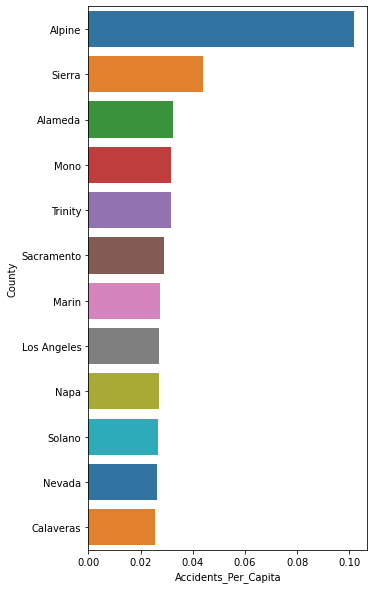

In [12]:
plt.figure(figsize=(5,10))
g_2five=countyinfo[countyinfo['Accidents_Per_Capita']>.025]
ax2=sns.barplot(x='Accidents_Per_Capita',y='County', data=g_2five, order=g_2five.sort_values('Accidents_Per_Capita',ascending=False).County, palette='tab10')

['Los Angeles', 'San Diego', 'Orange', 'Santa Clara', 'Alameda', 'Sacramento', 'Contra Costa', 'San Francisco', 'San Mateo', 'Santa Cruz']
['Los Angeles', 'Orange', 'Santa Clara', 'Alameda', 'Sacramento', 'Contra Costa', 'San Francisco', 'San Mateo', 'Solano', 'Santa Cruz', 'Marin']
['green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'gray', 'green', 'gray']


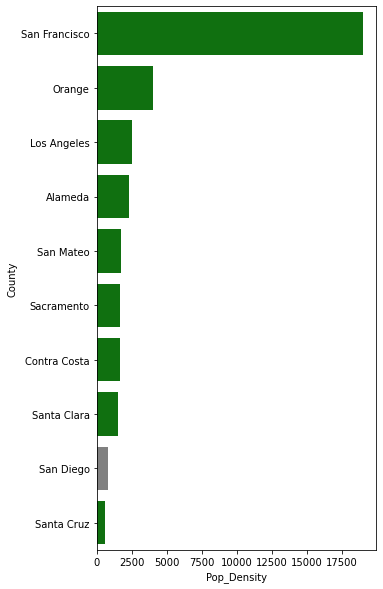

In [68]:
countyinfo['Pop_Density']=countyinfo['pop2020']/countyinfo['Square_Miles']
g_12=countyinfo[countyinfo['Accidents_Per_Square_Mile']>12]
g_pop=countyinfo[countyinfo['Pop_Density']>600]
popval=list(g_pop['County'].values)
accval=list(g_12['County'].values)
print(popval)
print(accval)
clrs = ['green' if (x in popval) else 'gray' for x in accval]
print(clrs)
plt.figure(figsize=(5,10))

ax2=sns.barplot(x='Pop_Density',y='County', data=g_pop, order=g_pop.sort_values('Pop_Density',ascending=False).County, palette=clrs)



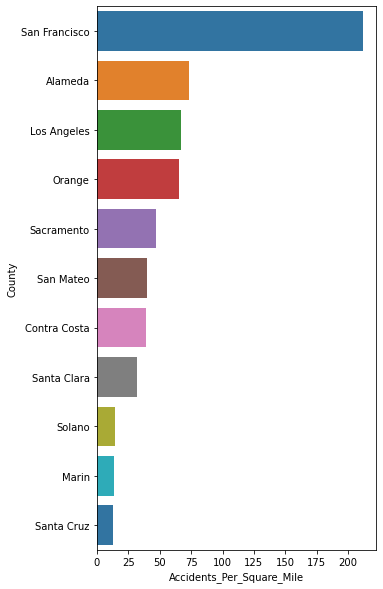

In [14]:
plt.figure(figsize=(5,10))
g_five=countyinfo[countyinfo['Accidents_Per_Square_Mile']>12]
ax=sns.barplot(x='Accidents_Per_Square_Mile',y='County', data=g_five,order=g_five.sort_values('Accidents_Per_Square_Mile',ascending=False).County, palette='tab10')